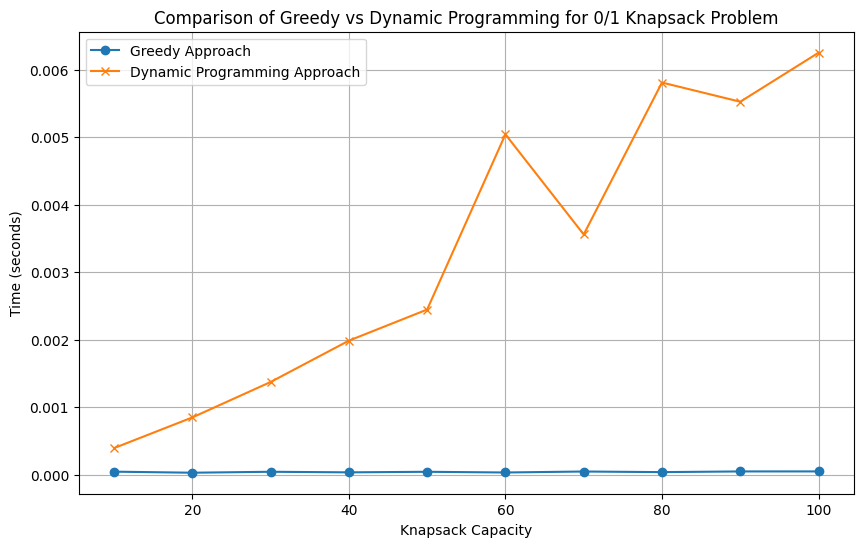

In [6]:
import time
import random
import matplotlib.pyplot as plt

def greedy_knapsack(weights, values, capacity):
    # Calculate value-to-weight ratios
    ratio = [v / w for v, w in zip(values, weights)]
    items = sorted(range(len(weights)), key=lambda i: ratio[i], reverse=True)

    total_value = 0.0
    for i in items:
        if weights[i] <= capacity:
            capacity -= weights[i]
            total_value += values[i]
        else:
            total_value += values[i] * (capacity / weights[i])
            break  # The knapsack is full
    return total_value

def dynamic_knapsack(weights, values, capacity):
    n = len(values)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(n + 1):
        for w in range(capacity + 1):
            if i == 0 or w == 0:
                dp[i][w] = 0
            elif weights[i - 1] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - weights[i - 1]] + values[i - 1])
            else:
                dp[i][w] = dp[i - 1][w]

    return dp[n][capacity]

# Main function to compare performance
if __name__ == "__main__":
    capacities = list(range(10, 101, 10))  # Different capacities
    greedy_times = []
    dp_times = []

    for capacity in capacities:
        # Generate random weights and values
        n = 50  # Number of items
        weights = [random.randint(1, 20) for _ in range(n)]
        values = [random.randint(10, 100) for _ in range(n)]

        # Measure greedy execution time
        start_time = time.time()
        greedy_knapsack(weights, values, capacity)
        greedy_time = time.time() - start_time
        greedy_times.append(greedy_time)

        # Measure dynamic programming execution time
        start_time = time.time()
        dynamic_knapsack(weights, values, capacity)
        dp_time = time.time() - start_time
        dp_times.append(dp_time)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.plot(capacities, greedy_times, label='Greedy Approach', marker='o')
    plt.plot(capacities, dp_times, label='Dynamic Programming Approach', marker='x')
    plt.title('Comparison of Greedy vs Dynamic Programming for 0/1 Knapsack Problem')
    plt.xlabel('Knapsack Capacity')
    plt.ylabel('Time (seconds)')
    plt.legend()
    plt.grid()
    plt.show()